### PHY 411
#### Jeremy Kazimer
#### jdkazime@buffalo.edu

#### _Import Statements_

As always, our import statements:

In [114]:
import numpy as np
import pandas as pds
from matplotlib import pyplot as plt
import tensorflow_probability as tfp

#### _Solution_

The premise of this assignment is to redo the fitting application from last semester.  However, `tensorflow_probability` eases the difficulty of this problem in some ways, but increases them in others. To begin, we can load the data:

In [115]:
co2_data = np.loadtxt('https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_mm_mlo.txt').T

And extracting the data that we want:

In [117]:
months, co2_amount =  co2_data[2], co2_data[3]
co2_train = co2_amount[:-120]
months_train = months[:-120]

Note that since this data is broken up into each element being a month, if we want to predict the past ten years then we have to split the data as such.  Further, there's no need to remove elements, since we're not using their standard deviation at all.  Last time, this was because of BFGS fit required STD, whereas this time our methodology does not.  

Now, we can create a `LocalLinearTrend` object, which will be used to predict on the seasonal data.  As such, we also build the model with initial conditions:

In [118]:
trend = tfp.sts.LocalLinearTrend(observed_time_series = co2_train)
seasonal = tfp.sts.Seasonal(
    num_seasons = 12, observed_time_series = co2_train)
model = tfp.sts.Sum([trend, seasonal], observed_time_series = co2_train)

We will also need to make some more initial conditions, so that the model can fit properly.  This is done through the factored surrogate posterior:

In [119]:
sample = tfp.sts.build_factored_surrogate_posterior(model)

Now, we can make the actual prediction:

In [120]:
co2_prediction = tfp.sts.forecast(
    model,
    observed_time_series = co2_train,
    parameter_samples=fit.sample(100),
    num_steps_forecast= 120 )

In [121]:
final_prediction = co2_prediction.mean()

And, of course, a plot:

(380.0, 420.0)

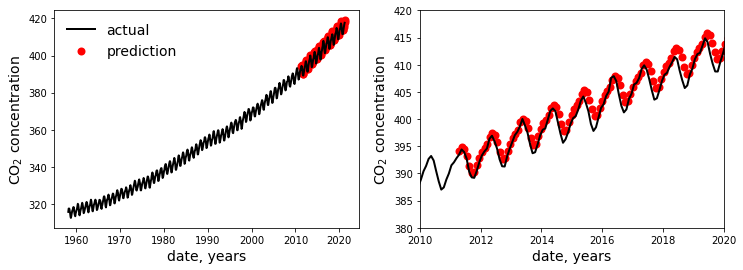

In [139]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

axs[0].scatter(np.linspace(months[-120], months[-120]+10, 120), final_prediction, lw = 2, c = 'red', label = 'prediction')
axs[0].plot(months, co2_amount, lw = 2, c = 'k', label = 'actual')

axs[0].set_xlabel('date, years', fontsize = 14)
axs[0].set_ylabel('CO$_2$ concentration', fontsize = 14)
axs[0].legend(loc = 'upper left', fontsize = 14, frameon = False)

axs[1].scatter(np.linspace(months[-120], months[-120]+10, 120), final_prediction, lw = 2, c = 'red', label = 'prediction')
axs[1].plot(months, co2_amount, lw = 2, c = 'k', label = 'actual')

axs[1].set_xlabel('date, years', fontsize = 14)
axs[1].set_ylabel('CO$_2$ concentration', fontsize = 14)

axs[1].set_xlim(2010, 2020)
axs[1].set_ylim(380, 420)

Ultimately, it's pretty accurate.  I think that if this model was actually trained like they do in the example, then this would be better.  Of course, the predictions are going to get worse as it moves away from the endpoint, since the further that it ventures into unknown territory the more difficulty it will have.  Regardless, the prediction is pretty good!